<a href="https://colab.research.google.com/github/doungge/Multicampus-/blob/master/%EC%9D%B8%EA%B5%AC%EB%8C%80%EB%B9%84_seoul_CCTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울시 인구대비 Seoul CCTV 증가율에 대한 데이터 분석
___
두개의 데이터를 합쳐서 분석해보기

In [3]:
#한글 폰트사용
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus']= False
plt.rc('font', family='NanumBarunGothic')
#오류안보이게 하기
import warnings
warnings.filterwarnings('ignore')

In [4]:
!ls

sample_data  seoulCCTV.csv  seoulPopulation.xls


In [5]:
import pandas as pd
import numpy as np

SDF = pd.read_csv('seoulCCTV.csv', encoding = 'utf-8')
SDF.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
# 기관명을 구별로 바꾸기
SDF.rename(columns={SDF.columns[0] : '구별'}, inplace= True)
SDF.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [7]:
SDF.sort_values(by='소계', ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [9]:
SDF['최근증가율'] = ((SDF['2016년']+SDF['2015년']+SDF['2014년'])/SDF['2013년도 이전'])*100
SDF.sort_values(by= '최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [10]:
SDFP=pd.read_excel('seoulPopulation.xls',header=2, usecols='B,D,G,J,N')
SDFP.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [13]:
SDFP.rename(columns = {SDFP.columns[0] : '구별',
                       SDFP.columns[1] : '인구수',
                       SDFP.columns[2] : '한국인',
                       SDFP.columns[3] : '외국인',
                       SDFP.columns[4] : '고령자'}, inplace = True)
SDFP.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [15]:
SDFP.drop(index=[0], inplace=True)

SDFP.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [17]:
#NAN 정보 확인
SDFP[SDFP['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [19]:
SDFP.tail()

,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [20]:
SDFP.drop(index=[26], inplace=True)

In [21]:
DF = pd.merge(SDF, SDFP, on = '구별')

In [22]:
DF.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0


In [27]:

del DF['2014년']
del DF['2015년']
del DF['2016년']

DF.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0


In [28]:
DF.set_index('구별', inplace = True)

In [29]:
DF.head()

,소계,최근증가율,인구수,한국인,외국인,고령자
구별,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0


In [30]:
del DF['한국인']
del DF['외국인']
del DF['고령자']

DF.head()

,소계,최근증가율,인구수
구별,,,
강남구,2780,150.619195,570500.0
강동구,773,166.490765,453233.0
강북구,748,125.203252,330192.0
강서구,884,134.793814,603772.0
관악구,1496,149.290780,525515.0


In [31]:
#인구수와 소계 상관계수 지정하기
print(np.corrcoef(DF['인구수'],DF['소계'])) 


[[1.         0.30634228]
 [0.30634228 1.        ]]


In [32]:
# CCTV개수(소계)와 인구수의 관계
DF.sort_values(by ='소계', ascending= False).head()

,소계,최근증가율,인구수
구별,,,
강남구,2780,150.619195,570500.0
양천구,2034,34.671731,479978.0
서초구,1930,63.371266,450310.0
은평구,1873,85.237258,494388.0
용산구,1624,53.216374,244203.0


In [35]:
DF.sort_values(by='인구수', ascending=False).head()


,소계,최근증가율,인구수
구별,,,
송파구,618,104.347826,667483.0
강서구,884,134.793814,603772.0
강남구,2780,150.619195,570500.0
노원구,1265,188.929889,569384.0
관악구,1496,149.290780,525515.0


##시각화하기

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


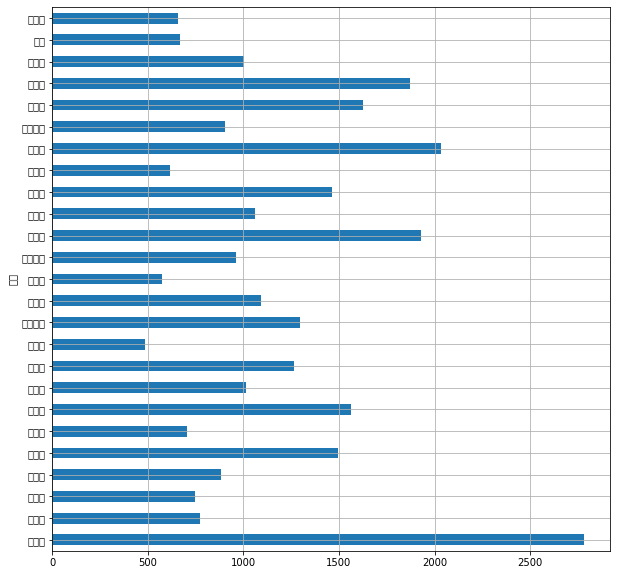

In [37]:
DF['소계'].plot(kind = 'barh', grid = True, figsize=(10,10))
plt.show()

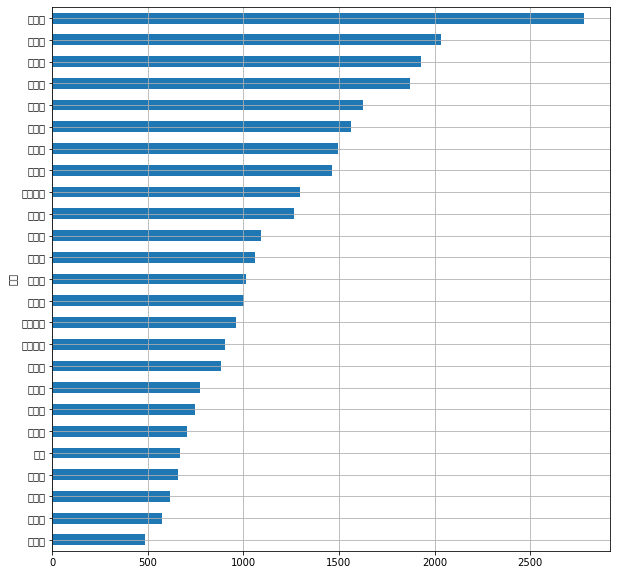

In [38]:
DF['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10))

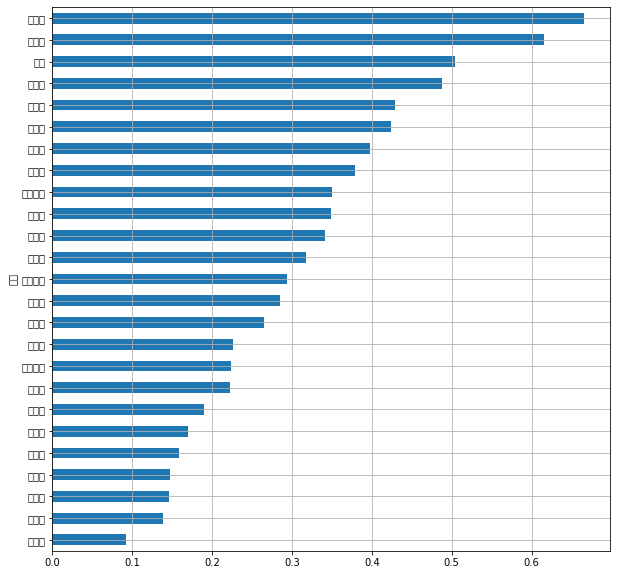

In [41]:
DF['CCTV 비율'] = DF['소계']/DF['인구수']*100
DF['CCTV 비율'].sort_values().plot(kind = 'barh', grid=True, figsize=(10,10))
plt.show()

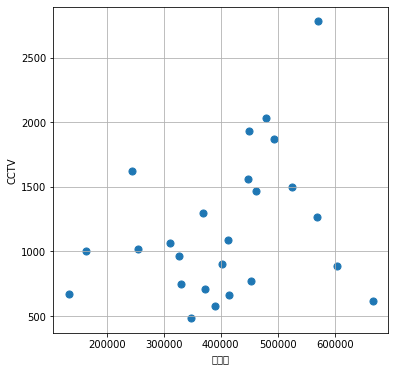

In [42]:
# 산점도 
plt.figure(figsize=(6,6))
plt.scatter(DF['인구수'], DF['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [45]:
# 회귀계수 계산
import numpy as np
np.set_printoptions(suppress = True) #과학적 표기법을 없애고 싶을때 사용

fp1 = np.polyfit(DF['인구수'], DF['소계'],1) #회귀방정식 구하는법

fp1

array([  0.00130916, 645.06649658])

In [61]:
f1 = np.poly1d(fp1) #회귀식 구하는 공식
print(f1, '\n')

fx = np.linspace(100000,700000,100)
print(fx)

 
0.001309 x + 645.1 

[100000.         106060.60606061 112121.21212121 118181.81818182
 124242.42424242 130303.03030303 136363.63636364 142424.24242424
 148484.84848485 154545.45454545 160606.06060606 166666.66666667
 172727.27272727 178787.87878788 184848.48484848 190909.09090909
 196969.6969697  203030.3030303  209090.90909091 215151.51515152
 221212.12121212 227272.72727273 233333.33333333 239393.93939394
 245454.54545455 251515.15151515 257575.75757576 263636.36363636
 269696.96969697 275757.57575758 281818.18181818 287878.78787879
 293939.39393939 300000.         306060.60606061 312121.21212121
 318181.81818182 324242.42424242 330303.03030303 336363.63636364
 342424.24242424 348484.84848485 354545.45454545 360606.06060606
 366666.66666667 372727.27272727 378787.87878788 384848.48484848
 390909.09090909 396969.6969697  403030.3030303  409090.90909091
 415151.51515152 421212.12121212 427272.72727273 433333.33333333
 439393.93939394 445454.54545455 451515.15151515 457575.75757576
 4

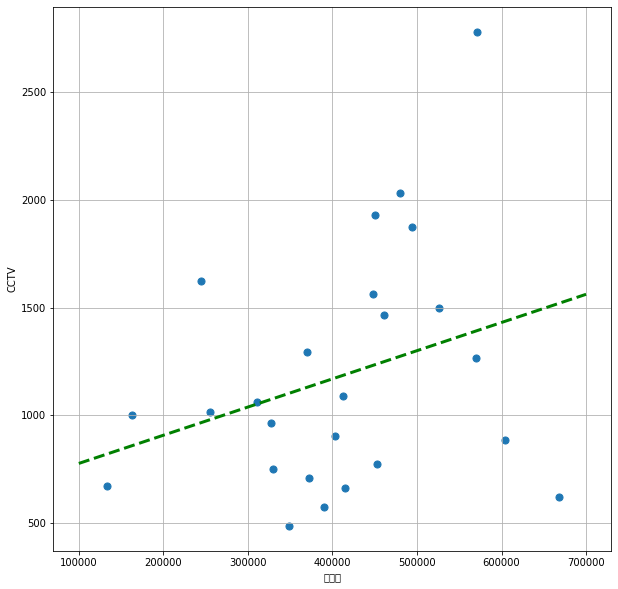

In [47]:
# 회귀선 추가
plt.figure(figsize = (10,10))
plt.scatter(DF['인구수'],DF['소계'], s =50)
plt.plot(fx, f1(fx), ls = 'dashed', lw=3, color = 'g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [50]:
# 오차열 추가후 시각화
fp1 = np.polyfit(DF['인구수'], DF['소계'],1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)
DF['오차'] = np.abs(DF['소계']-f1(DF['인구수']))

df_sort = DF.sort_values(by = '오차', ascending=False)

df_sort

,소계,최근증가율,인구수,CCTV 비율,오차
구별,,,,,
강남구,2780,150.619195,570500.0,0.487292,1388.055355
송파구,618,104.347826,667483.0,0.092587,900.911312
양천구,2034,34.671731,479978.0,0.423769,760.563512
서초구,1930,63.371266,450310.0,0.428594,695.403794
용산구,1624,53.216374,244203.0,0.665020,659.231690
도봉구,485,246.638655,348646.0,0.139110,616.501341
마포구,574,212.101911,389649.0,0.147312,581.180999
은평구,1873,85.237258,494388.0,0.378852,580.698457
강서구,884,134.793814,603772.0,0.146413,551.503155


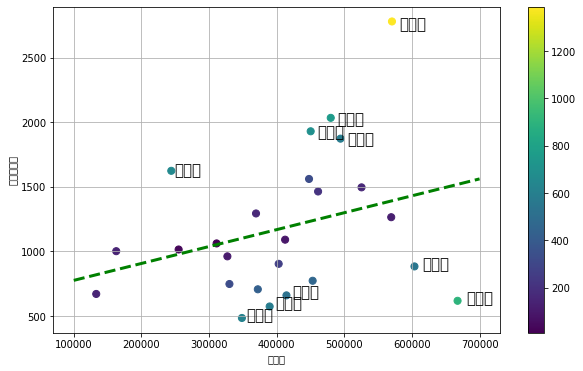

In [62]:
# 최종 시각화
import seaborn as sns
plt.figure(figsize= (10,6))
plt.scatter(DF['인구수'], DF['소계'], c = DF['오차'], s= 50) #s 마커의 사이즈 c 마커의 색상
plt.plot(fx, f1(fx), ls = 'dashed', lw =3, color= 'g') #lw 선의 굵기 ,ls 선 스타일
#sns.regplot(x=DF['인구수'],y=DF['소계'] ,data=DF)
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02,
             df_sort['소계'][n]*0.98,
             df_sort.index[n],
             fontsize=15)
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()